In [1]:
# personal imports
import prepare
import explore

# typical imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# modeling methods
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# working with dates
from datetime import datetime
import time
from datetime import timedelta

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

import re

#clean look
import warnings
warnings.filterwarnings("ignore")

prep_tiktok(df)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4734 entries, 2022-09-16 00:00:00+00:00 to 2022-09-16 00:00:00+00:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   views    4734 non-null   int64 
 1   hashtag  4734 non-null   object
dtypes: int64(1), object(1)
memory usage: 111.0+ KB


/Users/jgardin875/codeup-data-science/Brad-file/prepare.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.views = df.views.astype('int')


<Figure size 432x288 with 0 Axes>

# Tiktok

In [2]:
tik = pd.read_csv('tik_tok_views.csv')

In [3]:
tik.date = pd.to_datetime(tik.date, utc = True)
tik.set_index('date', inplace =True)
tik.sort_index(inplace=True);

In [4]:
tik.category.unique()

array(['humor', 'political', 'fashion', 'fitness & lifestyle', 'food'],
      dtype=object)

In [5]:
yt = pd.read_csv('yt_views.csv')

In [6]:
yt.date = pd.to_datetime(yt.date, utc = True)
yt.set_index('date', inplace =True)
yt.sort_index(inplace=True);

In [7]:
yt.category.unique()

array(['fitness & lifestyle', 'fashion', 'humor', 'food'], dtype=object)

In [8]:
y_fit = yt[yt.category == 'fitness & lifestyle'] 
y_fas = yt[yt.category == 'fashion' ]
y_hum = yt[yt.category == 'humor' ]
y_fod = yt[yt.category == 'food']

In [9]:
t_fit = tik[tik.category == 'fitness & lifestyle'] 
t_fas = tik[tik.category == 'fashion' ]
t_hum = tik[tik.category == 'humor' ]
t_fod = tik[tik.category == 'food']

In [10]:
yt = pd.read_csv('yt_views.csv')
yt.date = pd.to_datetime(yt.date, utc = True)
yt.set_index('date', inplace =True)
yt.sort_index(inplace=True);

In [11]:
t_fit_m=t_fit.resample('M').mean()
t_fas_m=t_fas.resample('M').mean()
t_hum_m=t_hum.resample('M').mean()
t_fod_m=t_fod.resample('M').mean()

In [12]:
y_fit_m=y_fit.resample('M').mean()
y_fas_m=y_fas.resample('M').mean()
y_hum_m=y_hum.resample('M').mean()
y_fod_m=y_fod.resample('M').mean()

In [13]:
yt_m = yt.resample('M').mean()

In [14]:
tik_m = tik.resample('M').mean()

In [16]:
b_fit_m = y_fit_m.join(t_fit_m, how = 'outer', lsuffix = '_y', rsuffix = '_t')
b_fas_m = y_fas_m.join(t_fas_m, how = 'outer', lsuffix = '_y', rsuffix = '_t')
b_hum_m = y_hum_m.join(t_hum_m, how = 'outer', lsuffix = '_y', rsuffix = '_t')
b_fod_m = y_fod_m.join(t_fod_m, how = 'outer', lsuffix = '_y', rsuffix = '_t')

In [32]:
yt.tail(1)

,views,hashtag,category
date,,,
2022-09-11 00:00:00+00:00,81,clothinghaul,fashion


<AxesSubplot:xlabel='date'>

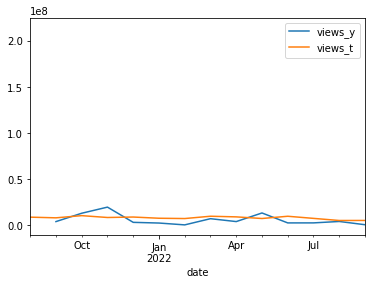

In [33]:
b_fit_m.plot(xlim = ('2021-08-19 00:00:00+00:00', '2022-09-11 00:00:00+00:00'))

<AxesSubplot:xlabel='date'>

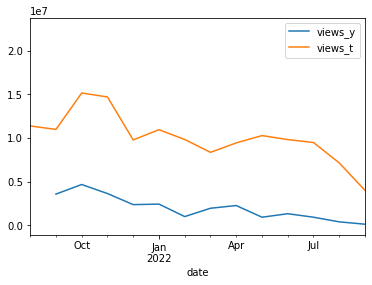

In [34]:
b_fas_m.plot(xlim = ('2021-08-19 00:00:00+00:00', '2022-09-11 00:00:00+00:00'))

<AxesSubplot:xlabel='date'>

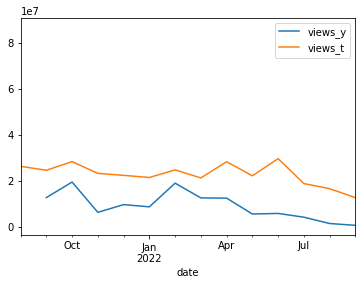

In [35]:
b_hum_m.plot(xlim = ('2021-08-19 00:00:00+00:00', '2022-09-11 00:00:00+00:00'))

<AxesSubplot:xlabel='date'>

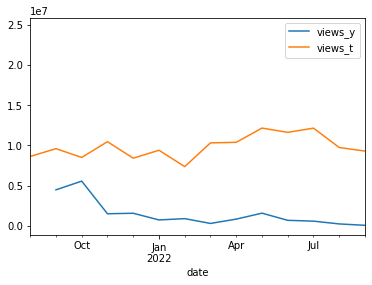

In [36]:
b_fod_m.plot(xlim = ('2021-08-19 00:00:00+00:00', '2022-09-11 00:00:00+00:00'))